# Milagro: Predicting Store Profitability at a Fast-Casual Restaurant Chain

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/SandrineLpx/510B-case-1-Milagro/refs/heads/main/test_data.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/SandrineLpx/510B-case-1-Milagro/refs/heads/main/train_data.csv')
df_const = pd.read_csv('https://raw.githubusercontent.com/SandrineLpx/510B-case-1-Milagro/refs/heads/main/site_const_data-1.csv')


In [ ]:
display(df_train.head())
display(df_train.info())
display(df_train.describe())

,store.number,annual.profit,state,agg.inc,sqft,col.grad,com60,lci,nearcomp,nearmil,freestand,gini,housemed
0,1,414343.2017,AZ,4.255695e+07,292,0.235476,0.284834,5.989973,2,5.3,0,0.3889,951.061759
1,2,514643.9619,AZ,7.125694e+07,399,0.039562,0.196429,8.057567,6,13.1,0,0.2434,778.084732
2,3,443096.4316,AZ,9.766750e+07,666,0.215767,0.063625,6.267259,0,30.2,0,0.3179,844.555614
3,4,495031.1367,AZ,5.555884e+07,862,0.136619,0.390704,8.566326,0,29.4,0,0.4132,1420.138726
4,5,962170.0304,AZ,1.336343e+08,724,0.259778,0.427308,4.077841,6,10.1,0,0.4911,1164.426764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   store.number   374 non-null    int64  
 1   annual.profit  374 non-null    float64
 2   state          374 non-null    object 
 3   agg.inc        374 non-null    float64
 4   sqft           374 non-null    int64  
 5   col.grad       374 non-null    float64
 6   com60          374 non-null    float64
 7   lci            374 non-null    float64
 8   nearcomp       374 non-null    int64  
 9   nearmil        374 non-null    float64
 10  freestand      374 non-null    int64  
 11  gini           374 non-null    float64
 12  housemed       374 non-null    float64
dtypes: float64(8), int64(4), object(1)
memory usage: 38.1+ KB


None

,store.number,annual.profit,agg.inc,sqft,col.grad,com60,lci,nearcomp,nearmil,freestand,gini,housemed
count,374.000000,3.740000e+02,3.740000e+02,374.000000,374.000000,374.000000,374.000000,374.00000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,7.735204e+05,1.222069e+08,602.692513,0.235088,0.156977,7.607611,2.57754,15.001604,0.141711,0.497839,1230.947909
std,108.108742,4.468403e+05,1.153058e+08,205.219530,0.128779,0.113618,1.516641,2.09125,12.593032,0.349221,0.133943,529.079868
min,1.000000,1.022288e+05,7.809335e+06,217.000000,0.017112,0.000000,1.103248,0.00000,0.000000,0.000000,0.161000,165.034213
25%,94.250000,4.973337e+05,5.409382e+07,474.500000,0.136999,0.072675,6.707498,1.00000,5.325000,0.000000,0.409100,862.808875
50%,187.500000,6.566799e+05,9.058616e+07,574.000000,0.219420,0.126033,7.794125,2.00000,11.700000,0.000000,0.504300,1151.371574
75%,280.750000,8.818421e+05,1.412333e+08,710.000000,0.312818,0.219010,8.604602,4.00000,22.600000,0.000000,0.575825,1496.533613
max,374.000000,3.293559e+06,8.806363e+08,2084.000000,0.689092,0.577105,10.729450,7.00000,88.700000,1.000000,0.949400,3668.943949


# 1. Dataset Preparation and Rationale

## Question 1

In [ ]:
# Training data % of the total data
374/460

0.8130434782608695

Kathleen's team split the data into training set (374 stores) and test set (85 stores) to prevent overfitting by testing on unseen data.

a) Training data are ~81% of the total data

b) The training set will be used for training the model and to fit the regression model. The testing set will be used for evaluating the model after training. This is important to show how well the model generalized the data it hasn;t seen before.
It is important not to use the test set during model building to avoid prevent overfitting by testing on unseen data. Like this Kathleen's team can check if the model is truly capturing general patterns and not just memorizing the training data.

#2. Kathleen's Original Model


##Question 2

Fit a linear regression model using the training data with the four variables:
agg.inc, sqft, col.grad, and com60.

(a) Write the complete linear regression equation for predicting annual store profitability
from these four predictors. Your equation should be in the form:
annual.profit = β0 + β1 × agg.inc + β2 × sqft + β3 × col.grad + β4 × com60

In [ ]:
# linear regression equation for predicting annual store profitability from these four predictors: agg.inc, sqft, col.grad, and com60.
model_A = smf.ols(formula='Q("annual.profit") ~ Q("agg.inc") + sqft + Q("col.grad") + com60', data = df_train) # Q() function (Q stands for "Quote") for column names with dots or special characters in statsmodels
model_A_fit = model_A .fit()
print(model_A_fit.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("annual.profit")   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     339.1
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          3.73e-122
Time:                        23:55:01   Log-Likelihood:                -5107.5
No. Observations:                 374   AIC:                         1.022e+04
Df Residuals:                     369   BIC:                         1.024e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       8.36e+04   4.11e+04      2.035

a) Based on result:

annual.profit = 83600 + 0.0028 × agg.inc + 383.3631 × sqft + 346800 × col.grad + 218300 × com60

- β₀ = 83600 (Intercept)
- β₁ = 0.0028 (coefficient for agg.inc)
- β₂ = 383.3631 (coefficient for sqft)
- β₃ = 346800 (coefficient for col.grad)
- β₄ = 218300 (coefficient for com60)

## Question 3

Using the estimated regression model, what annual profitability is predicted
for a Milagro store located in an area with:
- Aggregate income (agg.inc) of $100,000,000
- Store size (sqft) of 800 square feet
- College graduate percentage (col.grad) of 0.30 (30%)
- **Long** commute percentage (com60) of 0.10 (10%)

In [ ]:
predicted_annual_profit = 83600 + 0.0028 * 100000000 + 383.3631 * 800 + 346800 * 0.3 + 218300 * 0.1
predicted_annual_profit

796160.48

The annual profitability predicted for a Milagro store located in such area is $ 796,160.48.

## Question 4

a) R2 value on the training data

From OLS Regression Results ouput,  R2 = 0.786 (R-squared: 0.786).
It means that the model explains 78.6% o fthe variance in annual profit on the training data which is a strong fit.


b) R2 value on the test data

In [ ]:
# Make prediction on the test data and get annual.profit test values.

# Training R²
R2_train_A = model_A_fit.rsquared
print(f"\nModel A Training R²: {R2_train_A:.4f}")

# Test R²
y_test_pred_A = model_A_fit.predict(df_test)
y_test = df_test['annual.profit']
SSE_A = np.sum((y_test - y_test_pred_A)**2)
SST = np.sum((y_test - df_train['annual.profit'].mean())**2)
R2_test_A = 1 - SSE_A/SST
print(f"Model A Test R²: {R2_test_A:.4f}")



Model A Training R²: 0.7861
Model A Test R²: 0.7201


R2 value on the test data is 0.720 (72.0%), meaning 72% variance explained. The difference between the 2 models is 0.786 - 0.720 = 0.066, lower than 10% difference so it means that the model performs well on unseen data.


## Question 5


a) If the p-value < 0.05 then the variable is statistically significant. In this case ll four variables are statistically significant at the 5% level. Each predictors has a meaningful relationship with annual proit

b) agg.inc has the smallest p-value (most statistically significant)

Looking at just the p-value again, both agg.inc and sqft show p = 0.000 rounded. To determine which is smaller , we are looking at the t-statistic. Higher t-statistic = smaller p-value. So agg.inc has the smallest p-value.

c) com60 has the largest p-value (0.027)



# 3. Exploratory Correlation Analysis

## Question 6

Compute the correlation matrix for all numerical predictor variables (exclude
store.number, annual.profit, and state).

(a) The dataset now has 10 predictor variables: the 4 original variables plus 6 new
variables. Identify the three pairs of variables with the strongest correlations
(highest absolute values). Report the correlation coefficient for each pair.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   store.number   374 non-null    int64  
 1   annual.profit  374 non-null    float64
 2   state          374 non-null    object 
 3   agg.inc        374 non-null    float64
 4   sqft           374 non-null    int64  
 5   col.grad       374 non-null    float64
 6   com60          374 non-null    float64
 7   lci            374 non-null    float64
 8   nearcomp       374 non-null    int64  
 9   nearmil        374 non-null    float64
 10  freestand      374 non-null    int64  
 11  gini           374 non-null    float64
 12  housemed       374 non-null    float64
dtypes: float64(8), int64(4), object(1)
memory usage: 38.1+ KB


In [ ]:
# Select numerical predictor variables exlucing store.number, annual.profit and state
predictor_cols = ['agg.inc', 'sqft', 'col.grad', 'com60', 'lci', 'nearcomp', 'nearmil', 'freestand', 'gini', 'housemed']
correlation_matrix = df_train[predictor_cols].corr()
print(correlation_matrix.round(3))

           agg.inc   sqft  col.grad  com60    lci  nearcomp  nearmil  \
agg.inc      1.000  0.512     0.670 -0.239 -0.315    -0.148    0.160   
sqft         0.512  1.000     0.353 -0.055 -0.300    -0.074    0.122   
col.grad     0.670  0.353     1.000 -0.224 -0.314    -0.182    0.065   
com60       -0.239 -0.055    -0.224  1.000 -0.004     0.025    0.038   
lci         -0.315 -0.300    -0.314 -0.004  1.000     0.071   -0.115   
nearcomp    -0.148 -0.074    -0.182  0.025  0.071     1.000   -0.110   
nearmil      0.160  0.122     0.065  0.038 -0.115    -0.110    1.000   
freestand    0.173  0.150     0.166 -0.032 -0.220     0.104    0.211   
gini         0.069  0.111     0.001 -0.035 -0.105     0.112   -0.012   
housemed     0.486  0.177     0.547 -0.106 -0.152    -0.175    0.032   

           freestand   gini  housemed  
agg.inc        0.173  0.069     0.486  
sqft           0.150  0.111     0.177  
col.grad       0.166  0.001     0.547  
com60         -0.032 -0.035    -0.106  
lci    

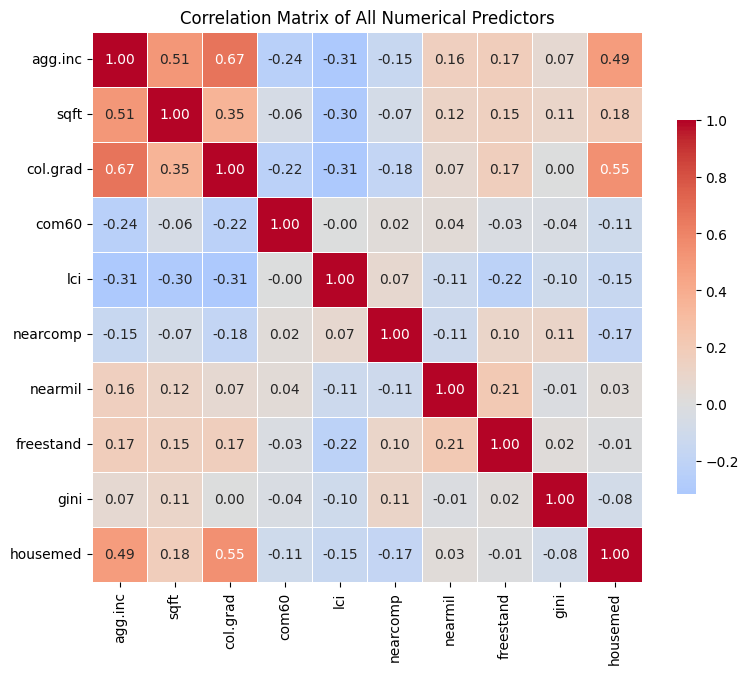

In [ ]:
# Create heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title('Correlation Matrix of All Numerical Predictors', fontsize=12)
plt.tight_layout()
plt.show()

The 3 pairs of variables with the strongest correlations are col.grad and housemed (0.55), col.grad and agg.inc (0.67), sqft and agg.inc (0.51).
While col.grad, agg.inc and sqft are in the model, housemed was not.


##Question 7
7. Statistical significance of new variables: Build a regression model using ALL 10
variables (the 4 original plus 6 new variables). Test the statistical significance of each
variable at the 5% level (α = 0.05).
2

(a) Which of the 6 new variables (lci, nearcomp, nearmil, freestand, gini, housemed)
are statistically significant?

(b) Which of the new variables are NOT significant? What does this suggest about
their usefulness in predicting store profitability?

In [ ]:
# 7 regression model using 10 variables: 'agg.inc', 'sqft', 'col.grad', 'com60', 'lci', 'nearcomp', 'nearmil', 'freestand', 'gini', 'housemed'
model_B = smf.ols(formula='Q("annual.profit") ~ Q("agg.inc") + sqft + Q("col.grad") + com60 + lci + nearcomp + nearmil + freestand + gini + housemed', data = df_train)
model_B_fit = model_B.fit()
print(model_B_fit.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("annual.profit")   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     406.1
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          2.74e-190
Time:                        23:55:02   Log-Likelihood:                -4928.3
No. Observations:                 374   AIC:                             9879.
Df Residuals:                     363   BIC:                             9922.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.279e+05    6.2e+04      2.062

a) For statistical significance I am looking at the p-value < 0.05 = statistically significant. "agg.inc") + sqft + Q("col.grad") + com60'
In that case lci, nearcomp, nearmil, freestand are significly significant.

b) However, gini with P-value=0.724 and housemed with P=0.343 (way above 0.05) are not significant. It means that income inequality and median house value variables do not help predict store profitability.

# 4. Model Comparison

##Question 8
Fit and evaluate four models using the training data:

Model A: Kathleen’s Original Model
Variables: agg.inc, sqft, col.grad, com60

Model B: Full Model
Variables: All variables except store.number, annual.profit, and state

Model C: Parsimonious Model
• Build this model by removing variables that meet either of these criteria:
- Variables that are NOT statistically significant at the 5% level (from Question 7).
- Variables involved in pairs with absolute correlation > 0.70 (from Question
6). For highly correlated pairs, keep the variable with stronger correlation to
the outcome variable (annual.profit).

Model D: Alternative Model
- Start with the original 4 variables (agg.inc, sqft, col.grad, com60).
- Add ONE variable from the 4 significant new variables identified in Question 7: lci, nearcomp, nearmil, freestand.
- Test each of the 4 possible additions (one at a time) and choose the one that:
  * Improves test R2 compared to Model A, and
  * Maintains total profitability prediction ≥ $40 million.

###a) Model D - variable selection

In [ ]:
# Model C: Parsimonious Model
# Remove gini and housemed (not significant)
# Keep 8 variables: 'agg.inc', 'sqft', 'col.grad', 'com60', 'lci', 'nearcomp', 'nearmil', 'freestand'

model_C = smf.ols(formula='Q("annual.profit") ~ Q("agg.inc") + sqft + Q("col.grad") + com60 + lci + nearcomp + nearmil + freestand', data=df_train)
model_C_fit = model_C.fit()

In [ ]:
# Model D: Alternative Model
# Test adding each of: lci, nearcomp, nearmil, freestand

new_variables = ['lci', 'nearcomp', 'nearmil', 'freestand']
results_D = {}

for var in new_variables:
    print(f"\n--- Testing: Original 4 + {var} ---")

    formula = f'Q("annual.profit") ~ Q("agg.inc") + sqft + Q("col.grad") + com60 + {var}'
    model_D_temp = smf.ols(formula=formula, data=df_train)
    model_D_temp_fit = model_D_temp.fit()

    # Training R²
    R2_train_temp = model_D_temp_fit.rsquared

    # Test R²
    y_test_pred_temp = model_D_temp_fit.predict(df_test)
    SSE_temp = np.sum((y_test - y_test_pred_temp)**2)
    R2_test_temp = 1 - SSE_temp/SST

    # Total predicted profitability
    total_profit_temp = y_test_pred_temp.sum()

    # Store results
    results_D[var] = {
        'R2_train': R2_train_temp,
        'R2_test': R2_test_temp,
        'total_profit': total_profit_temp,
        'model_fit': model_D_temp_fit
    }

    print(f"Training R²: {R2_train_temp:.4f}")
    print(f"Test R²: {R2_test_temp:.4f}")
    print(f"Total Predicted Profit (test): ${total_profit_temp:,.0f}")
    print(f"Improves Test R² vs Model A? {R2_test_temp > R2_test_A}")
    print(f"Total Profit ≥ $40M? {total_profit_temp >= 40000000}")



--- Testing: Original 4 + lci ---
Training R²: 0.7968
Test R²: 0.7670
Total Predicted Profit (test): $66,551,055
Improves Test R² vs Model A? True
Total Profit ≥ $40M? True

--- Testing: Original 4 + nearcomp ---
Training R²: 0.8179
Test R²: 0.7703
Total Predicted Profit (test): $65,322,879
Improves Test R² vs Model A? True
Total Profit ≥ $40M? True

--- Testing: Original 4 + nearmil ---
Training R²: 0.7997
Test R²: 0.7161
Total Predicted Profit (test): $70,640,126
Improves Test R² vs Model A? False
Total Profit ≥ $40M? True

--- Testing: Original 4 + freestand ---
Training R²: 0.8916
Test R²: 0.8188
Total Predicted Profit (test): $67,670,777
Improves Test R² vs Model A? True
Total Profit ≥ $40M? True


a) For Model D, the varibale I added is freestand. While fresstand, lci, and nearcomp all meet the criteria of improving Test R² from Model A 0.7201, and meets profit requirement >$40M, freestand has the highest R² with 0.8188. The improvment is important, of +9.87%pts in Test R².

In [ ]:
# Model D Original 4 + freestand
model_D = smf.ols(formula='Q("annual.profit") ~ Q("agg.inc") + sqft + Q("col.grad") + com60 + freestand', data=df_train)
model_D_fit = model_D.fit()


### b) Training R2, Test R2 and predict profitability for NEW potential locations for each model

In [ ]:
# ==========================================
# Model A: Print Training R² and Test R²
# Print Training R² and Test R²
print(f"\nModel A Training R²: {R2_train_A:.4f}")
print(f"Model A Test R²: {R2_test_A:.4f}")

# Print overfitting gap
print(f"Overfitting gap: {R2_train_A - R2_test_A:.4f}")

# Total predicted profitability for the 48 construction sites
y_const_pred_A = model_A_fit.predict(df_const)
total_profit_const_A = y_const_pred_A.sum()
print(f"Model A Total Predicted Profit construction sites (in millions): ${total_profit_const_A/1000000:.2f}M")


# ==========================================
# Model B: Calculate and print Training R² and Test R²
# Training R²
R2_train_B = model_B_fit.rsquared
print(f"\nModel B Training R²: {R2_train_B:.4f}")

# Test R²
y_test_pred_B = model_B_fit.predict(df_test)
SSE_B = np.sum((y_test - y_test_pred_B)**2)
R2_test_B = 1 - SSE_B/SST
print(f"Model B Test R²: {R2_test_B:.4f}")

# Print overfitting gap
print(f"Overfitting gap: {R2_train_B - R2_test_B:.4f}")

# Total predicted profitability for the 48 construction sites
y_const_pred_B = model_B_fit.predict(df_const)
total_profit_const_B = y_const_pred_B.sum()
print(f"Model B Total Predicted Profit construction sites (in millions): ${total_profit_const_B/1000000:.2f}M")

# ==========================================
# MODEL C: Calculate and print Training R² and Test R²
# Training R²
R2_train_C = model_C_fit.rsquared
print(f"\nModel C Training R²: {R2_train_C:.4f}")

# Test R²
y_test_pred_C = model_C_fit.predict(df_test)
SSE_C = np.sum((y_test - y_test_pred_C)**2)
R2_test_C = 1 - SSE_C/SST
print(f"Model C Test R²: {R2_test_C:.4f}")

# Print overfitting gap
print(f"Overfitting gap: {R2_train_C - R2_test_C:.4f}")

# Total predicted profitability for the 48 construction sites
y_const_pred_C = model_C_fit.predict(df_const)
total_profit_const_C = y_const_pred_C.sum()
print(f"Model C Total Predicted Profit construction sites (in millions): ${total_profit_const_C/1000000:.2f}M")

# ==========================================
# MODEL D: Calculate and print Training R² and Test R²
# Training R²
R2_train_D = model_D_fit.rsquared
print(f"\nModel D Training R²: {R2_train_D:.4f}")

# Test R²
y_test_pred_D = model_D_fit.predict(df_test)
SSE_D = np.sum((y_test - y_test_pred_D)**2)
R2_test_D = 1 - SSE_D/SST
print(f"Model D Test R²: {R2_test_D:.4f}")

# Print overfitting gap
print(f"Overfitting gap: {R2_train_D - R2_test_D:.4f}")

# Total predicted profitability for the 48 construction sites
y_const_pred_D = model_D_fit.predict(df_const)
total_profit_const_D = y_const_pred_D.sum()
print(f"Model D Total Predicted Profit construction sites (in millions): ${total_profit_const_D/1000000:.2f}M")




Model A Training R²: 0.7861
Model A Test R²: 0.7201
Overfitting gap: 0.0660
Model A Total Predicted Profit construction sites (in millions): $40.02M

Model B Training R²: 0.9179
Model B Test R²: 0.8272
Overfitting gap: 0.0908
Model B Total Predicted Profit construction sites (in millions): $36.06M

Model C Training R²: 0.9177
Model C Test R²: 0.8420
Overfitting gap: 0.0757
Model C Total Predicted Profit construction sites (in millions): $36.29M

Model D Training R²: 0.8916
Model D Test R²: 0.8188
Overfitting gap: 0.0728
Model D Total Predicted Profit construction sites (in millions): $37.33M


* Model A: Lowest accuracy but most conservative (least overfit with 0.066)
* Mobel B: Highest training score but larger overfit than others (0.091). Also, the lowest profit projection with $36.06M.
* Model C: Highest test R2 so the model generalized well to new, unseen data. With also a high training r2
* Model D: Good balance between fit and generalization. Closest to the $40M target (only $2.67M below target).


Model C best Statistical Model, and Model A only model meeting target, but with the least reliable.


##Question 9
### Model Recommended: Model D

Model A is the only model meeting the \$40M profit target, but has the lowest test R² (0.72), explaining only 72% of variance in unseen data compared to over 80% for other models. Selecting a weaker model solely to meet the \$40M expectation would be professionally questionable and could expose BVA to liability if Harriman Capital relies on inflated projections. The comparison between models would clearly reveal Model A's weakness, damaging both BVA's and Milagro's credibility.

Models B and C demonstrate the highest predictive accuracy. However, Model B includes many variables of limited statistical significance, making it unnecessarily complex and harder to interpret.

**I recommend Model D to Harriman Capital**. While Model C achieves the best predictive performance (test R² = 0.842), Model D offers strong predictive accuracy (test R² = 0.819, approximately 10 percentage points higher than Model A) with less overfitting than Model C. Model D introduces only one additional variable—"freestand"—which is highly statistically significant (t-statistic = 17.67, p < 0.001) with an estimated impact of approximately \$365K per site. Model D also predicts \$37.33M, closest to the \$40M target among the high-accuracy models.

**Business Risks:**

1. **Choosing Model A**: While meeting the \$40M target, its lower predictive accuracy creates significant risk of overestimating profitability by \$3-4M. If stores underperform, Harriman Capital could pursue legal action against BVA and Milagro for misrepresentation, damaging both firms' reputations.

2. **Choosing Model C/D**: Predicting \$37.3M (Model D) or \$36.3M (Model C) may jeopardize the deal, as Milagro's investors committed based on the \$40M projection. However, this risk can be mitigated through strategic site selection and transparent communication about model improvements.

BVA should emphasize that Model D's superior accuracy enables strategic optimization. By selectively building the highest-performing sites (if feasible), Milagro could exceed \$40M with greater confidence than building all 48 sites using less reliable projections. Prioritizing a model that better predicts future outcomes reduces the risk of overestimating profitability and making poor investment decisions.